In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot  as plt
import plotly.express as px

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
px.scatter(df,x='Glucose',y='Age',color='Outcome',symbol='Outcome')

<AxesSubplot:>

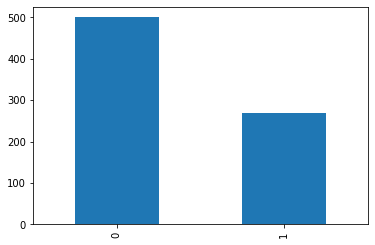

In [4]:
df.Outcome.value_counts().plot(kind='bar')

In [5]:
X = df[['Glucose','Age']]
y = df['Outcome']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,)
xtrain.shape,xtest.shape

((614, 2), (154, 2))

In [6]:
xtrain.shape,xtest.shape

((614, 2), (154, 2))

In [7]:
m=KNeighborsClassifier(n_neighbors=9)
m.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [8]:
m.score(xtest,ytest)

0.7337662337662337

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
ypred=m.predict(xtest)

In [11]:
import seaborn as sns


In [12]:
cm=confusion_matrix(ytest,ypred)
print(cm)

[[87 13]
 [28 26]]


In [13]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



#predction values

In [14]:
from matplotlib.colors import ListedColormap
import numpy as np
from utils import plot_area_distribution


plot_area_distribution(m,xtrain,ytrain,"logistic",'Salary','age')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


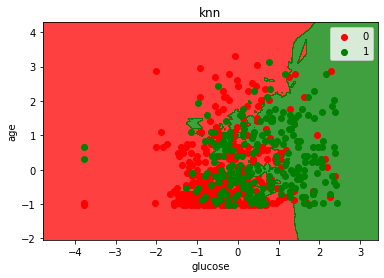

In [15]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"knn",'glucose','age')

#K-NN ALLGORITHM

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:

params={
            'n_neighbors':list(range(1,11)),
            'algorithm':['ball_tree','auto','brute'],
            'weigths':['distance'],
            'metrics':['minkowski'],
            'p':[2]
}
params

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'algorithm': ['ball_tree', 'auto', 'brute'],
 'weigths': ['distance'],
 'metrics': ['minkowski'],
 'p': [2]}

In [18]:
X =df[['Glucose','Insulin','Age']]
y =df['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,)

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [20]:
from sklearn.model_selection import  cross_val_score

In [21]:
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=3,n_jobs=-1,verbose=1)

In [22]:
grid.fit(scaledX,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
kn=pd.DataFrame(grid.cv_results_)


In [ ]:
kn.sort_values(by='Glucose',inplace=True)
